<a href="https://colab.research.google.com/github/Snafkin547/Quantum-ML/blob/main/QML_Ch8_QC_Theories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install qiskit
!pip install numpy scipy matplotlib ipython pandas sympy nose seaborn
!pip install scikit-learn
!pip install pylatexenc ipywidgets qutip
!pip install kaggle

In [3]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# Oracle=f(x)

def solve(oracle):

  qr=QuantumRegister(2)
  cr=ClassicalRegister(1)
  qc=QuantumCircuit(qr, cr)
  
  qc.x(1)
  qc.h(0)
  qc.h(1)

  oracle(qc)

  qc.h(0)
  qc.measure(qr[0], cr[0])

  backend=Aer.get_backend('qasm_simulator')

  results=execute(qc, backend, shots=1000).result().get_counts()
  return plot_histogram(results, figsize=(3,2), color=['white'])


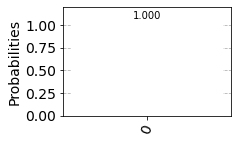

In [7]:
# oracle:f0 = always 0
def o_0(qc):
  pass

solve(o_0)


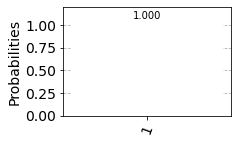

In [9]:
# oracle:f1 = 1 for 1, 0 for 0
def o_1(qc):
  qc.cx(0,1)

solve(o_1)


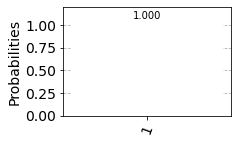

In [10]:
# oracle:f2 = 1 for 0, 0 for 1
def o_2(qc):
  qc.x(0)
  qc.cx(0,1)
  qc.x(0)

solve(o_2)


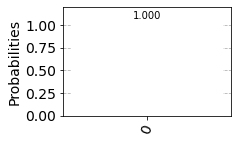

In [11]:
# oracle:f3 = always 1
def o_3(qc):
    qc.x(1)

solve(o_3)


In [12]:
from functools import reduce
from qiskit import QuantumCircuit, Aer, execute, ClassicalRegister, QuantumRegister
from math import asin, sqrt, ceil
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def run_with_oracle(oracle):

  qc=QuantumCircuit(1)
  
  qc.h(0)

  oracle(qc)

  qc.h(0)

  backend=Aer.get_backend('statevector_simulator')

  results=execute(qc, backend).result().get_counts()
  return results


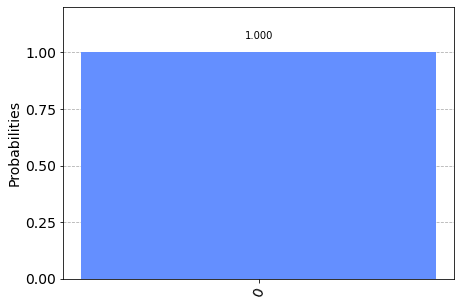

In [13]:
plot_histogram(run_with_oracle(lambda qc: qc.i(0)))

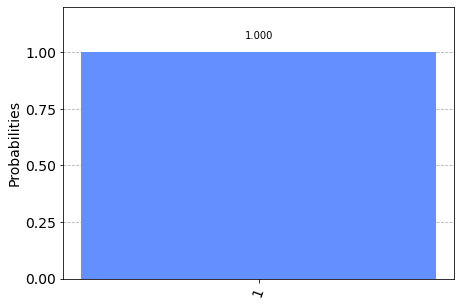

In [14]:
from math import pi
plot_histogram(run_with_oracle(lambda qc: qc.ry(pi,0)))